In [ ]:
# !pip install seaborn

In [36]:
import random
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt


import scipy  as sp


### Introduction to Kernel Density Estimation -- Histograms

* The histogram of random draws (randomint(0,99)) can be generated by tallying the number of data points within each bin of size 10.

* The bins are: \#0-9, \#10-19, \#20-29, ...

* Rather than code the process using Python standard library functionality, we will use `numpy` (`np`) to generate the counts

In [2]:
random_draws = np.random.randint(0, 100, 1000)
random_draws[0:20]

array([34, 23, 65, 23, 18, 17, 36, 15, 71, 36, 36, 57, 12, 50, 92, 79, 37,
       46, 41,  5])

In [18]:
bins = np.arange(0,101, 10)
bins


array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [19]:
counts_and_bins =  np.histogram(random_draws, bins)
print(counts_and_bins)
print("\n", "=+=" * 10, '\n')
print(counts_and_bins[0])
print(counts_and_bins[1])


(array([102,  89,  92, 105, 108,  94,  95, 100, 110, 105]), array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

 =+==+==+==+==+==+==+==+==+==+= 

[102  89  92 105 108  94  95 100 110 105]
[  0  10  20  30  40  50  60  70  80  90 100]


<AxesSubplot:>

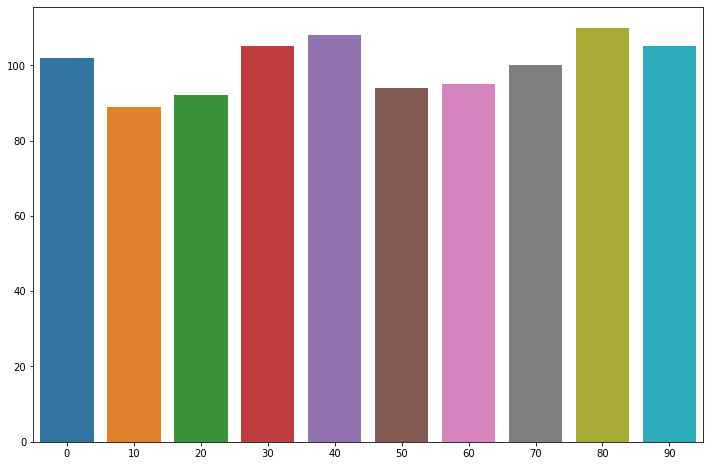

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x=counts_and_bins[1][:-1], y=counts_and_bins[0], )

### Frequencies and Probability Distributions

* Recall that this is not a valid probability distribution according to last week’s definition of prob. distribution.

  * Why? 
  
  * How can we turn it into a probability distribution
  

<AxesSubplot:>

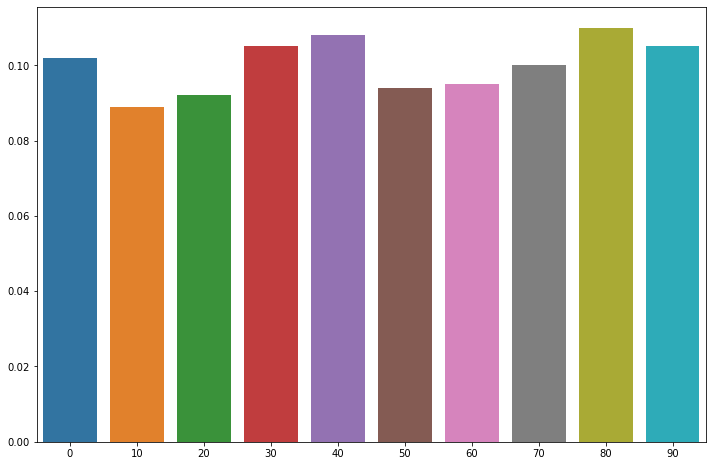

In [21]:
normalized_counts = counts_and_bins[0] / sum(counts_and_bins[0])

plt.figure(figsize=(12, 8))

sns.barplot(x=counts_and_bins[1][:-1], y=normalized_counts)

### Nonparametric Density Estimation For Discrete Random Variables

* Back to histograms: `np.histogram` allows computing normalized counts (`pmf` style)
  * `np.histogram(numbers, bins, density=True)`  

* A significant problem with histograms is that the choice of bin boundaries can have a disproportionate effect on the resulting viz 

* Probabilities for a bin can change based on the bin start and end location of the bin.
  * The probability distribution, and, therefore, the interpretation of the data can become inconsistent when using two different bin boundaries. 




<img src="https://www.dropbox.com/s/9mr7w52r575efqw/bin_diffs.png?dl=1" width="600" height="300"> 

_Histograms on same data, bins are of the same size, but histogram on the right has bins shifted to the right._

In [25]:
data = [119, 120, 121, 125, 129, 130, 130.1, 130.5, 130.7, 131]
bins_2  = range(115,136,5)
print(list(bins_2))


[115, 120, 125, 130, 135]


<AxesSubplot:>

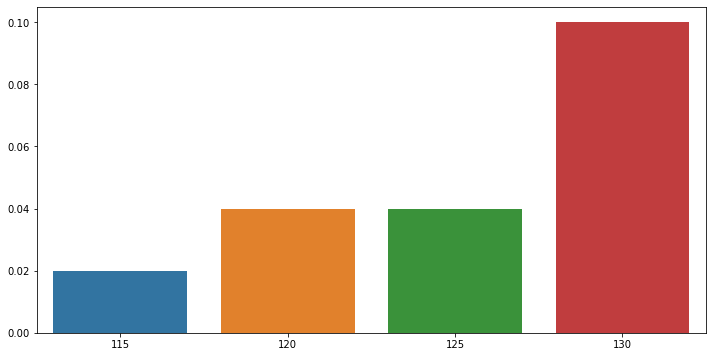

In [38]:

bins_2  = range(115,136,5)
counts =  np.histogram(data, bins_2, density=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=counts[1][:-1], y=counts[0])


<AxesSubplot:>

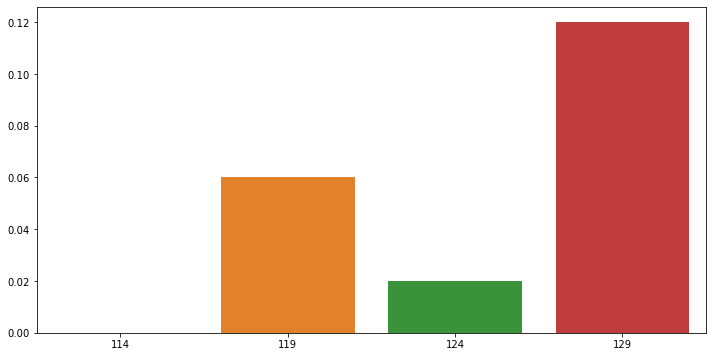

In [39]:
bins_3  = range(114,136,5)
counts =  np.histogram(data, bins_3, density=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=counts[1][:-1], y=counts[0])


<AxesSubplot:>

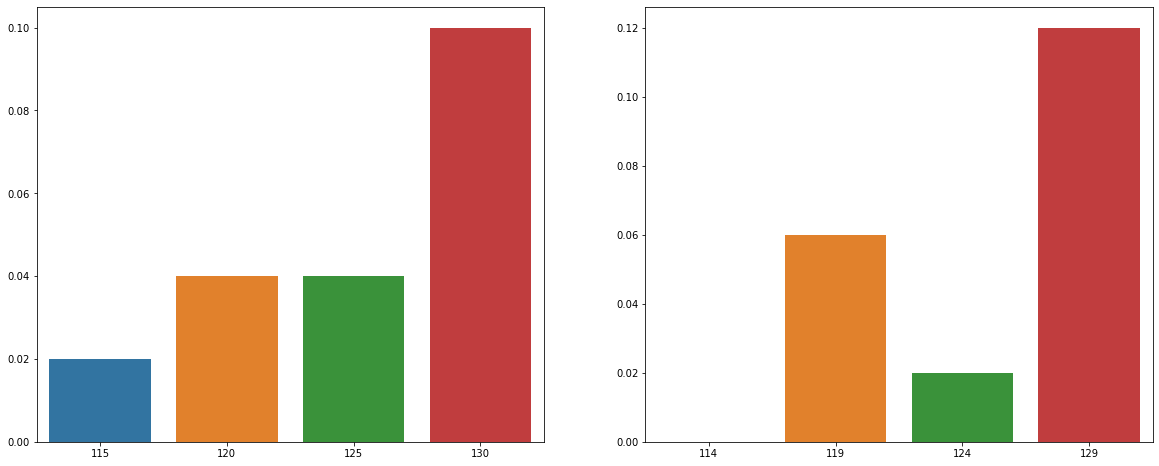

In [43]:
plt.figure(figsize=(20, 8))

bins_2  = range(115,136,5)
counts =  np.histogram(data, bins_2, density=True)
plt.subplot(1,2,1)
sns.barplot(x=counts[1][:-1], y=counts[0])


bins_3  = range(114,136,5)
counts =  np.histogram(data, bins_3, density=True)
plt.subplot(1,2,2)
sns.barplot(x=counts[1][:-1], y=counts[0])


## Estimating Densities using Kernels

* How can we bypass the use of bin boundaries? 
  * For instance, each data point could contribute **uniform** height to the histogram

* For each position along the $x$-axis -- including values with no data --  we draw bars the heights of which equal to the sum of overlapping blocks at that position 


<img src="https://www.dropbox.com/s/9jy3j38nepnl9az/top_hat_1.png?dl=1" width="600" height="300"> 

_Each data point contributes a uniform `heigh` value. The shaded regions representing two or more overlapping blocks_

<img src="https://www.dropbox.com/s/w6gev6hijhuipoo/top_hat_2.png?dl=1" width="600" height="300"> 


![](https://www.dropbox.com/s/4p0kqqkl2co236i/top_hat_example.png?dl=1)

### Estimating Densities using Kernels

* Applying this approach to the problematic histogram above produces a single, consistent visualization.

* Centering the box around each data point is a deterministic operation
  * Not dependent on where we start our bin

* We get an implied height for areas without a coverage 
  * That's good because samples are often unavailable for some areas of the sample space.

* Dense areas produce taller peaks
* We can make inferences about the population based on a finite data sample
  
* The square block we used here is called a Kernel, and the approach above is called Kernel Density Estimation

* Problem: leads to a more jagged histogram. 
  * Can very close values lead to such drastic disagreement in density?


### Using Different Kernels

* We are used to densities being smooth (as opposed to the jagged plot with the square kernel)

* Instead of using a square block, what if we use a smoother curve as the kernel of each of the point

  * which curve should we try?

### Using Different Kernels - Cont'd

* We could, for instance, use a Gaussian distribution, centered at the data point and with a scale of 0.1

* Rather than having each point contribute uniformly, we can determine the contribution of a point using its `pdf`


<img src="https://www.dropbox.com/s/72ga6i37eqbm0id/gaussian_kernel.png?dl=1" width="400"> 


### Using Different Kernels - Cont'd


- The contribution of a point at position $x$ is simply the sum of the 
`pdfs` with regard to each of the pdfs that overlap it

- Contribution of each data point is :

$$ 
\LARGE
\sum_{ x \in |X|} \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(x-\mu_x)^2}{2\sigma^2}}
$$

  * or in Python: `norm.pdf(x, `$\mu, \sigma$`)`
  
* The result is a smooth density-like estimate which is derived from the data



<img src="https://www.dropbox.com/s/goasfzoma1394np/final_kernel.png?dl=1" width="900"> 


### KDE Kernels

Other kernels are also available.

<img src="https://www.dropbox.com/s/64nhdmjmeemtb9h/kernels.png?dl=1" width="900">

### Differences Between the Kernels 

- Each of kernel emphasizes the contribution of neighboring points differently

- KDE with some Kernels is faster to compute than with others (ex. tophat versus Gaussian)
  - With a tophat kernel of width $k$, the complexity is at most $O(n)$ 
  - With  the Gaussian kernel, the complexity is at most $O(n^2)$
